# Poker Follow-up Notebook

This notebook takes portions from what we went over in class and attempts to but parts together to create a poker game.

What we have plenty of parts that work.  You can continue what is here and great a game, but you could look simulate the statistics we found about hands on wikipedia:
https://en.wikipedia.org/wiki/Five-card_draw

Pre-draw odds of getting each hand
* Royal flush <0.001%
* Straight flush (not including royal flush) <0.002%
* Four of a kind 0.02%
* Full house 0.14%
* Flush (excluding royal flush and straight flush) 0.20%
* Straight (excluding royal flush and straight flush) 0.39%
* Three of a kind 2.11%
* Two pair 4.75%
* One pair 42.30%
* No pair / High card 50.10%

Poker Probabilities 
https://en.wikipedia.org/wiki/Poker_probability

<br>

### Load Data

<hr>

##### Mount Drive - **Google Colab Only Step**

When using google colab in order to access files on our google drive we need to mount the drive by running the below python cell, then clicking the link it generates and pasting the code in the cell.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Change Directory To Access The Dependent Files - **Google Colab Only Step**

In [2]:
directory = "Teacher"
if (directory == "student"):
  %cd drive/Colab\ Notebooks/intro-to-python/
else:
  %cd drive/Shared\ drives/Rubrik/Data\ Science\ Track/intro-to-python

/content/drive/Shared drives/Rubrik/Data Science Track/intro-to-python


<hr>

### Import Needed Libraries

In [0]:
import random # to select random items from list of cards
from collections import defaultdict
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

# Import Poker Hand Evaluation Functions
from PokerEval import *

# library configurations
pd.set_option('display.max_rows', None)

### Create Required Dictionaries To Create A Deck Of Cards

In [0]:
RANKS = {
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
    10: "T",
    11: "J",
    12: "Q",
    13: "K",
    14: "A",
}

SUITS = {
    3: "S",  # Spades
    2: "H",  # Hearts
    1: "D",  # Diamonds 
    0: "C",  # Clubs 
}

SCORING = {
    0 : 'NO_PAIR',
    1 : 'PAIR',
    2 : 'TWO_PAIR',
    3 : 'THREE_OF_KIND',
    4 : 'STRAIGHT',
    5 : 'FLUSH',
    6 : 'FULL_HOUSE',
    7 : 'FOUR_OF_KIND',
    8 : 'STRAIGHT_FLUSH',
    9 : 'ROYAL_FLUSH'
}

<hr>

<br>

### Helper Functions

#### Displaying Card Functions

In [0]:
# Takes the hard coded path and grabs the interger value and returns it for the sorting method
def get_int(x):
    x = x.replace('./data/cards/Full/','')
    x = x.replace('.png','')
    return int(x)

# Loads the cards into a sorted list and returns a list of card images, where 2 of clubs is the first card and the last card is the Ace of Spades
def load_cards():
    images = []

    cardpath = glob.glob('./data/cards/Full/*.png')
    cardpath.sort(key = get_int)
    for img_path in cardpath:
        images.append(mpimg.imread(img_path))
    
    return images

def display_cards(images):       
    columns = len(images)
    plt.figure(figsize=(columns,16))

    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.axis('off')
        plt.imshow(image)

#### Deck Functions

In [0]:
# Create a new unshuffled deck of cards
def new_deck():
    return [RANKS[rank] + SUITS[suit] for rank in range(2, 15) for suit in range(0, 4)]

# Shuffle Deck
# Input: deck, times (optional)
# Output none
def deck_shuffle(deck, times = 3):
    for shuffle in range(times):
        random.shuffle(deck)

# Removes one card from deck
# Input: deck
# Output: card = [rank,suit]
def deal_card(deck):
    if len(deck) == 0:
        return []
    return deck.pop(0)

<hr>

<br>

### Use Helper Functions To Show Card Images

#### Invoke the function `load_cards` and store the result into a variable called `images`

In [0]:
images = load_cards()

#### Shuffle images using the random module's shuffle function
Note the shuffle is in an in-place operation

In [0]:
random.shuffle(images)

#### Display multiple cards
Pass a list of images to the `display_cards` function as it's argument 

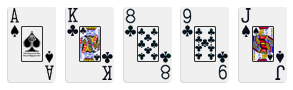

In [9]:
display_cards(images[0:5])

<hr>

<br>

### Build A Deck And Create A Hand

Assign a new variable `deck` the result of invoking the `new_deck` function

Then create an empty list called `hand`

Create a loop to append five cards into the hand list using the `deal_card` function while passing the `deck` reference

In [10]:
# build a new fresh deck
deck = new_deck()

hand = []
for i in range(0,5):
    card = deal_card(deck)
    hand.append(card)
    print(hand[i])

2C
2D
2H
2S
3C


<hr>

<br>

### Checking Multiple Types Of Hands

Here we have built a list of hands and a list to hold multiple functions. We do this so that we can create a loop to find out which type of hand we have.


**Important Note:** the function `check_no_pair` has not yet been created, so it is left out of the `poker_hands` list. 

The loop will cycle through highest scoring hands first and then cycle through to lower scoring hands, as soon as a function returns `true`, the loop will break due to finding the highest scoring hand. 

In [11]:
# create different hands
no_pair = ["3D", "JS", "QD", "5D", "AD"]
pair = ["3D", "JD", "QD", "Ah", "AD"]
two_pair = ["3S", "JS", "JD", "3H", "AD"]
trips = ["3D", "3H", "3S", "5D", "AD"]
straight = ["3D", "4D", "5H", "6D", "7S"]
full_house = ["3D", "3C", "3H", "5D", "5C"]
flush = ["3D", "JD", "QD", "5D", "AD"]
quads = ["3D", "3H", "QD", "3S", "3C"]
straight_flush = ["3D", "4D", "5D", "6D", "7D"]
royal_flush = ["TD", "JD", "QD", "KD", "AD"]

# create a list containing all of hands created above; omit the no_pair hand because we have not yet created a function to check that hand type yet
hands = [royal_flush, straight_flush, quads, full_house, flush, straight, trips, two_pair, pair ]

# function list
poker_hands = [
    check_royal_flush,
    check_straight_flush,
    check_four_of_a_kind,
    check_full_house,
    check_flush,
    check_straight,
    check_three_of_a_kind,
    check_two_pairs,
    check_one_pairs
    # Note: check_no_pair has not been created yet, we'll get to that later    
]

# iterate over the hands 
for hand in hands:
    # display the hand
    print(hand)
    
    # interate over poker_hands functions to evaluate the hand
    for i,f in enumerate(poker_hands):
        # print i and f
        print("i:", i)
        print("invoked function:", f)
        
        # create a scoring index based on the current value of i
        scoring_idx = len(SCORING) - 1 - i
        print("scoring_idx:", scoring_idx)
        
        # if a hand is evaluated to true then print out the details
        if (f(hand) == True ):
            print("{} : {} {} ".format(f(hand), hand, SCORING[scoring_idx])) 
            # print seperation for each hand
            print('\n' ,"-"*30, '\n')
            break # break the loop once the highest hand is found

['TD', 'JD', 'QD', 'KD', 'AD']
i: 0
invoked function: <function check_royal_flush at 0x7f9d6925cf28>
scoring_idx: 9
True : ['TD', 'JD', 'QD', 'KD', 'AD'] ROYAL_FLUSH 

 ------------------------------ 

['3D', '4D', '5D', '6D', '7D']
i: 0
invoked function: <function check_royal_flush at 0x7f9d6925cf28>
scoring_idx: 9
i: 1
invoked function: <function check_straight_flush at 0x7f9d6925cea0>
scoring_idx: 8
True : ['3D', '4D', '5D', '6D', '7D'] STRAIGHT_FLUSH 

 ------------------------------ 

['3D', '3H', 'QD', '3S', '3C']
i: 0
invoked function: <function check_royal_flush at 0x7f9d6925cf28>
scoring_idx: 9
i: 1
invoked function: <function check_straight_flush at 0x7f9d6925cea0>
scoring_idx: 8
i: 2
invoked function: <function check_four_of_a_kind at 0x7f9d6925ce18>
scoring_idx: 7
True : ['3D', '3H', 'QD', '3S', '3C'] FOUR_OF_KIND 

 ------------------------------ 

['3D', '3C', '3H', '5D', '5C']
i: 0
invoked function: <function check_royal_flush at 0x7f9d6925cf28>
scoring_idx: 9
i: 1
invok

<hr> 

<br>

## Exercises





### Create a new function to score the high card / no pair hand

Things to consider:
- What defines a high card hand?
- Should we consider a list of functions to loop through?

**Hint:** Look at what defines the other hands to define how a high card hand is defined; Maybe invoke the all the evaluation functions and if none of the functions return true then your hand is a high card



In [0]:
def check_high_card(hand):
    
    # function list
    poker_hands = [
        check_royal_flush,
        check_straight_flush,
        check_four_of_a_kind,
        check_full_house,
        check_flush,
        check_straight,
        check_three_of_a_kind,
        check_two_pairs,
        check_one_pairs    
    ]

    # Interate over functions to see if the hand returns true for any other hand type
    for i,f in enumerate(poker_hands):
        if f(hand) == True: 
            return False 
    # if no function returned true then we return true to signify that a high card hand is found    
    return True 

<hr>

<br>

### Create A Simulation To Draw Multiple Hands

Create a simulator that will run through (n) amount of times:
  - Create an list called `hands` to hold multiple drawings (a single hand) from a deck; one new deck and hand per each simulation
  - Create a variable, `number_of_simulations`, to hold the value of how many times the simulation should run. i.e. how many hands do you want to draw from new decks each time? 
  - Create a loop **(loop 1)** to loop the `number_of_simulations`:
    - Inside the loop create a new variable called `deck` which can be initialized by invoking the `new_deck` function
    - Shuffle the newly created deck using the `deck_shuffle` function, shuffle it as many times as you would like
    - Create an empty list called `hand` to hold multiple cards for a single simulation
    - Create a new loop **(loop 2)** to be executed 5 times. Inside the loop, for each iteration do the following:
       - pop a card from the `deck` using the `deal_card` function and store it in a variable called `card`
       - Append your `card` to your `hand` list
  - Once 5 cards have been added to your `hand` list and you're outside the scope of **loop 2**, but still inside the scope of **loop 1**, append the newly created `hand` to the `hands` list; which will hold multiple simulations of drawing cards.
  - Display hands to check your work

In [13]:
# Do simulation here
hands = []
number_of_simulations = 100
for i in range(number_of_simulations):
    # build a new deck
    deck = new_deck()

    # shuffle deck
    deck_shuffle(deck,5)

    # create an empty list to hold multiple cards 
    hand = []

    # loop through 5 times to deal 5 cards
    for i in range(0,5):
        # generate a card
        card = deal_card(deck)
        # append the card to the hand list
        hand.append(card)

    # append the hand (5 cards) to a list of multiple hands
    hands.append(hand)

# display hands
display(hands)

[['3D', '7D', 'TC', '5D', '4H'],
 ['5S', '2S', 'AD', '7C', '9S'],
 ['7C', '9H', '8C', 'KH', '8S'],
 ['AD', '8C', '3S', '7D', '2D'],
 ['4C', 'QH', 'TH', '7H', '5C'],
 ['KS', '2H', 'TD', '4D', '5S'],
 ['4C', '5S', 'QS', '7S', 'JC'],
 ['7C', 'AS', '9C', '2C', '2D'],
 ['QD', '6D', 'KD', 'KH', '7D'],
 ['6C', 'TH', '9C', '5C', '2H'],
 ['2S', '8H', 'JC', '9D', '4S'],
 ['8H', 'AH', '9S', '5H', '6H'],
 ['JC', 'AS', 'TD', '5C', '6H'],
 ['3H', 'QD', '2C', '3S', '6D'],
 ['KS', '3S', 'KH', '5C', 'AS'],
 ['4S', 'KH', '8D', '4C', '2C'],
 ['7C', 'KH', 'TH', '8S', 'KD'],
 ['JC', '9C', '6S', 'TS', '2S'],
 ['9D', 'AD', '4D', '6S', '2D'],
 ['JS', 'KH', 'JH', '5H', 'AH'],
 ['QD', '9C', 'TH', 'JS', '6H'],
 ['KS', 'JC', 'AC', '2S', 'QD'],
 ['5D', '6S', '5S', 'TH', '4D'],
 ['8S', '7C', '7D', 'JH', 'KS'],
 ['2C', '7S', 'TS', '6C', '3D'],
 ['2C', '4S', '6D', 'QS', '5S'],
 ['2D', 'JS', '4S', 'KC', 'QC'],
 ['4S', 'KC', '2C', '8D', 'JS'],
 ['7S', '2D', '4S', '3H', '4D'],
 ['4D', 'TD', '7H', 'JH', 'KS'],
 ['5C', '6

<br>

### Create a function to detect the name of the hand
- Create a function called `hand_name`, that accepts a parameter called `hand`
  - Declare a list called `poker_hands` to hold all of the functions definitions. Highest scoring hands should be added to the list first. This is because the loop will cycle through higher ranking hands and move towards lower scoring hands
  - Create a loop using python's `enumerate` function to cycle through the functions stored in `poker_hands`. invoke the appropriate function base on the iteration and as soon as any function returns `true`, return the name of the highest scoring hand using the `SCORING` Dictionary, you must provide the correct index to the `SCORING` dictionary to return the correct hand name.
  


In [0]:
def hand_name(hand):
    
    poker_hands = [
        check_royal_flush,
        check_straight_flush,
        check_four_of_a_kind,
        check_full_house,
        check_flush,
        check_straight,
        check_three_of_a_kind,
        check_two_pairs,
        check_one_pairs,
        check_high_card
    ]


    # Interate over functions to see if the hand is a high_card
    for i,f in enumerate(poker_hands):
        if f(hand) == True: 
            return SCORING[len(SCORING) - i -1]

<br> 

### Populate a `hand_names` list 
- create an empty list called `hand_names`
- loop through the `hands` list created earlier
  - Invoke the `hand_name` function with the `hand` being passed in as an argument, append the returned value to the `hand_names` list

In [0]:
hand_names = []
for hand in hands:
    hand_names.append(hand_name(hand))

<hr>

<br> 

### Create a Data Frame To Analyze Distributions Of Hands
#### Create a pandas DataFrame to hold the `hands` list, and `hand_names` value for each observation so that we can perform statistical operations using pandas build in functions later

Assign a variable with the following name, `hands_df`

- Use the pandas `DataFrame` function
  - set the `data` argument to a ***list*** holding the following values:
    - hands (a list)
    - hand_names (a list)
  - set the `index` argument to a ***list*** holding the following values
    - 'hand' (string)
    - 'hand_name' (string)
- Transpose the DataFrame you just created for readability using the `transpose` method by chaining it on the newly created DataFrame

Example: 

```python
hands_df = pd.DataFrame(data=[hands, hand_names], index=['hand', 'hand_name']).transpose()
```

In [0]:
hands_df = pd.DataFrame(data=[hands, hand_names], index=['hand', 'hand_name']).transpose()

<br>

#### Add a score series/column to the DataFrame using the `SCORING` dictionary 

##### Create a function called `hand_score`
- This function should accept a hand name as an argument
- This function should return the key index of the specific hand name


In [0]:
def hand_score(hand_name):
    for key, value in SCORING.items():
        if value == hand_name:
            return key

##### Using Pandas's apply method and the newly created function `hand_score`
Create a a new column for the dataframe called `hand_score`. Assign a new column with the score of each hand.



In [0]:
hands_df['hand_score'] = hands_df['hand_name'].apply(hand_score)

##### Print the head of the dataframe

In [19]:
hands_df.head()

,hand,hand_name,hand_score
0,"[3D, 7D, TC, 5D, 4H]",NO_PAIR,0
1,"[5S, 2S, AD, 7C, 9S]",NO_PAIR,0
2,"[7C, 9H, 8C, KH, 8S]",PAIR,1
3,"[AD, 8C, 3S, 7D, 2D]",NO_PAIR,0
4,"[4C, QH, TH, 7H, 5C]",NO_PAIR,0


<br> 

### Display Distribution Of Hands

**Hint:** Invoke the `value_counts` method on the `hand_name` series and divide that returned value by the `number_of_simulations` to find the percentages of hands 

In [20]:
hands_df['hand_name'].value_counts() / number_of_simulations

NO_PAIR          0.52
PAIR             0.41
TWO_PAIR         0.03
THREE_OF_KIND    0.03
STRAIGHT         0.01
Name: hand_name, dtype: float64

<hr>

<br>

### Image Mapping
Create a mapping function called `get_image_path_name` which accepts a single card (a two character string) as an input, to map any card to the correct image in an images list. 

**Hint:** think of an unshuffled deck and look at the order of the images and their respective filepath name to think of a solution. Use a *dictionary* or *list* to do your mapping of finding the index of the card in for the filepath name of the images.


In [0]:
# Do image mapping here
def get_image_path_name(card):
     
    # Create Dictionaries for mapping strings to ints
    rank_to_int = {
        "2":2,
        "3":3,
        "4":4,
        "5":5,
        "6":6,
        "7":7,
        "8":8,
        "9":9,
        "T":10,
        "J":11,
        "Q":12,
        "K":13,
        "A":14,
    }
    suit_to_int = {
        'C': 1,
        'D': 2,
        'H': 3,
        'S': 4
    }
    
    rank = rank_to_int[card[0]]
    suit = suit_to_int[card[1]]
    
    rank_shift = 2 # due to ranks starting at 2 not 1
    num_suits = 4
    
    filename_path_idx = (rank - rank_shift) * num_suits + suit
    
    filename_path = './data/cards/Full/' + str(filename_path_idx) + '.png'
    
    return filename_path

#### Test your logic by invoking the newly created function with individual cards 

In [22]:
print(get_image_path_name('AS'))

./data/cards/Full/52.png


<br>

### Display a hand that is dealt from a shuffled deck

#### Create a function called `display_hand` which accepts a hand (list of 5 strings) and prints the hand to the screen without returning anything. 

**Hint:** go look at how the helper functions at the top of the notebook were implemented

In [0]:
def display_hand(hand):
    
    # create a list of card filename paths
    cardpaths = [get_image_path_name(image) for image in hand] # glob.glob('./data/cards/Full/*.png')
    # sort in ascending order using a helper function created below
    cardpaths.sort()
    
    # create an empty list to hold the images created by using matplotlib's `mpimg` submodule's `imread` function
    images = []
    # load the images list 
    for img_path in cardpaths:
        images.append(mpimg.imread(img_path))

    # Create a figure to display the images
    columns = len(images)
    plt.figure(figsize=(columns,16))
    
    # loop through images and plot the on the newly created figure
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.axis('off')
        plt.imshow(image)

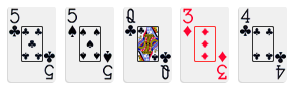

In [24]:
display_hand(hand)

### Display all hands in the simulation

**Hint:** Loop through the list `hands` and invoke the `display_hand` function passing in each hand as an argument

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


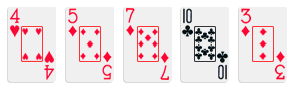

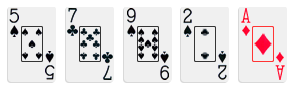

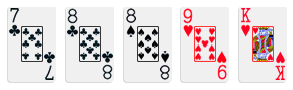

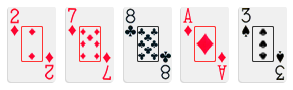

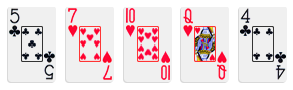

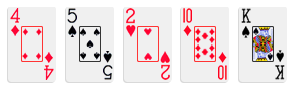

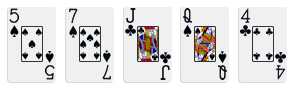

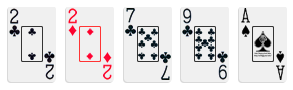

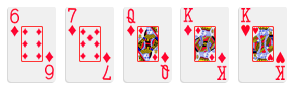

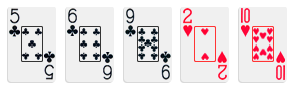

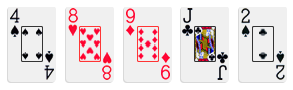

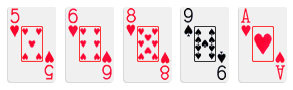

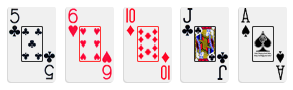

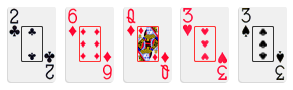

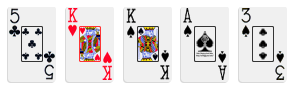

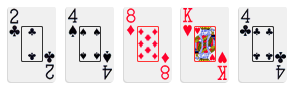

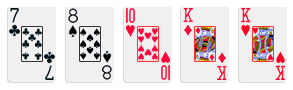

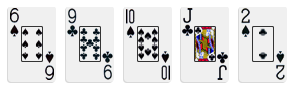

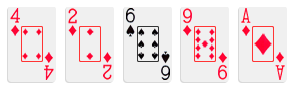

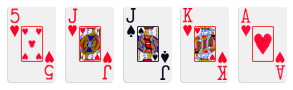

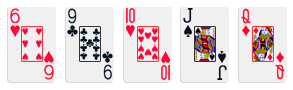

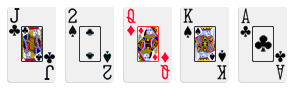

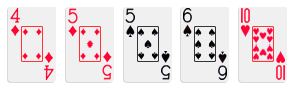

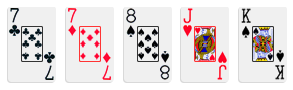

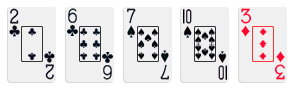

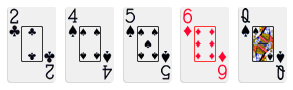

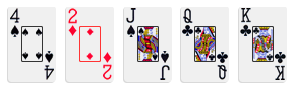

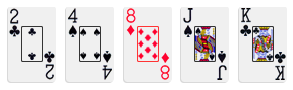

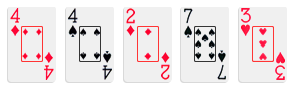

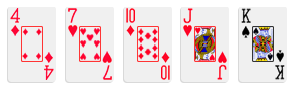

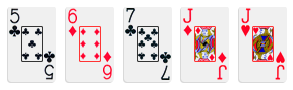

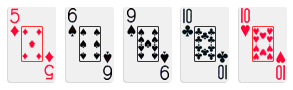

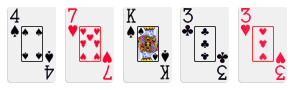

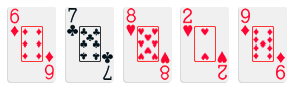

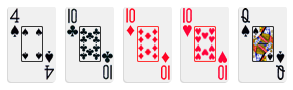

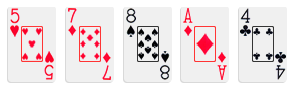

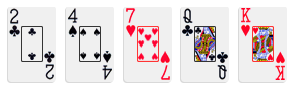

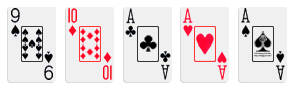

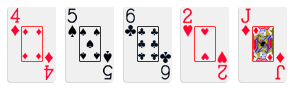

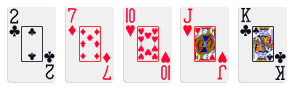

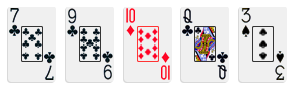

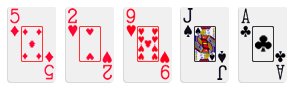

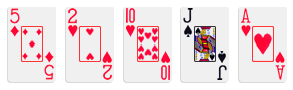

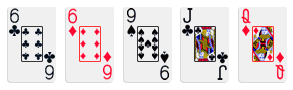

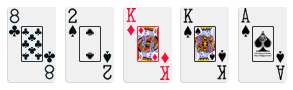

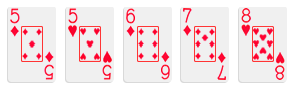

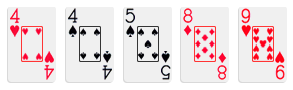

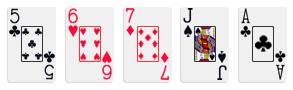

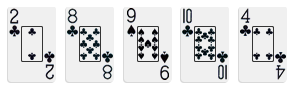

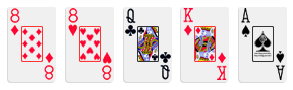

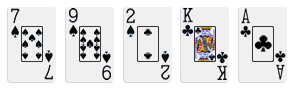

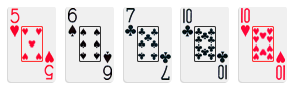

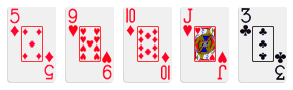

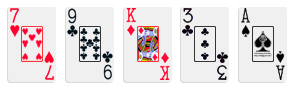

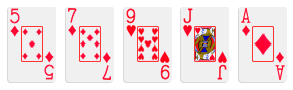

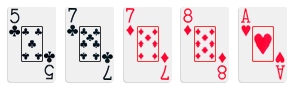

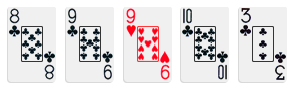

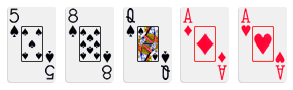

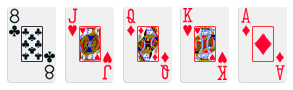

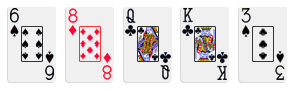

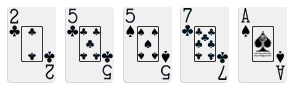

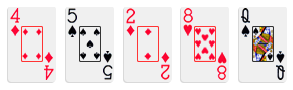

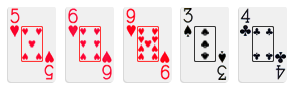

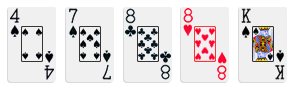

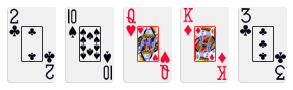

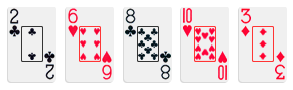

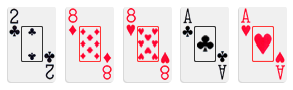

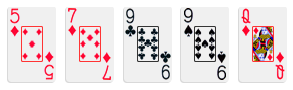

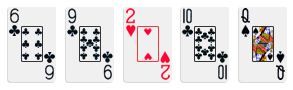

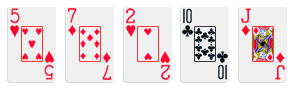

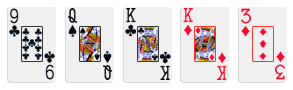

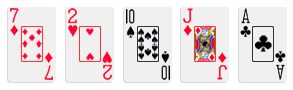

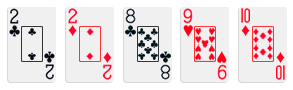

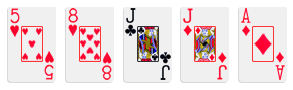

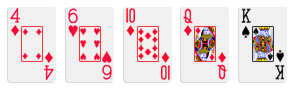

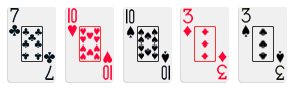

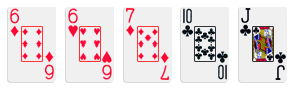

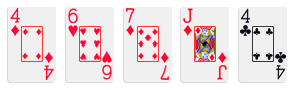

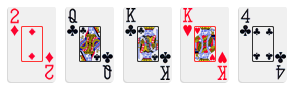

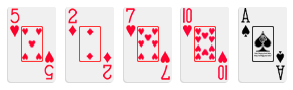

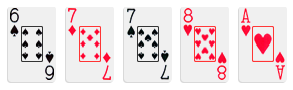

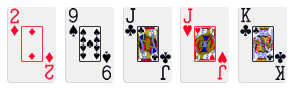

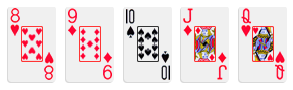

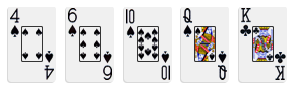

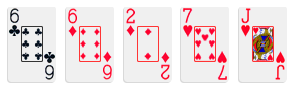

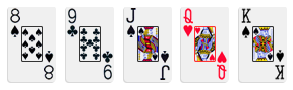

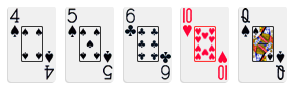

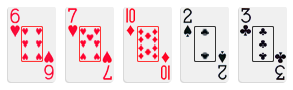

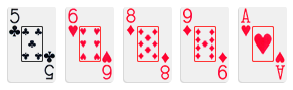

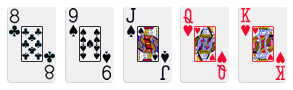

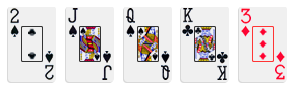

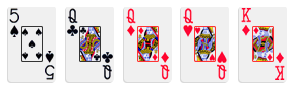

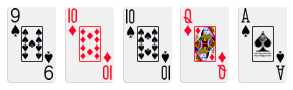

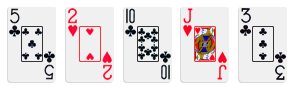

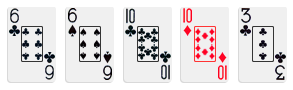

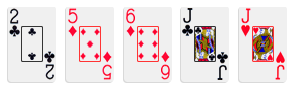

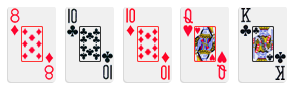

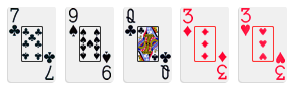

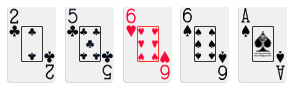

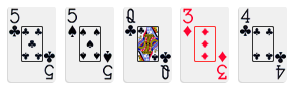

In [25]:
for hand in hands:
  display_hand(hand)

<hr>

<br>

# Extra:

## Understanding What An Image Is Through Displaying An Individual card 

### It's a good time to understand what an image really is under the hood:

An image is a multi-dimensional array.

It technically has two axes, one for height (rows of the multi-dimensional list, and one for length (columns of the multi-dimensional list). 

If we were to describe it using an analogy, I'd call say it looks like a mail room.

<img src="https://images.squarespace-cdn.com/content/v1/59f5ea27d0e6280e18995131/1538049023760-30F8PMOB7IFWDIBDXC4G/ke17ZwdGBToddI8pDm48kLwWn1QqgfsMM8VcxkbpeJFZw-zPPgdn4jUwVcJE1ZvWQUxwkmyExglNqGp0IvTJZamWLI2zvYWH8K3-s_4yszcp2ryTI0HqTOaaUohrI8PID4yvSxrL7XKbJlvNj6lGdhydg0W9TD0dOWbPzsnpOoc/MAILROOM_NEW-YORK-CITY_WALL-STREET_LOUNGE_WEWORK_5.png"></img>

> You can think of storing data inside each box. We will be storing a list  with 4 values in each box. One value for each of the rgba placeholders. Each placeholder can be a value from 0 to 255. 

Key:
- r - red value
- g - green value
- b - blue value
- a - transparency (0 is 100% transparent, 255 is 0% transparent) 

![Image](https://lab.arts.ac.uk/uploads/images/gallery/2017-11-Nov/pixels-on-screen-01.png)

### Display the first (lowest value) card in the deck


Two of clubs:


array([[[1.        , 1.        , 1.        , 0.        ],
        [1.        , 1.        , 1.        , 0.        ],
        [0.9411765 , 0.9411765 , 0.9411765 , 0.3137255 ],
        ...,
        [0.9411765 , 0.9411765 , 0.9411765 , 0.8117647 ],
        [0.9411765 , 0.9411765 , 0.9411765 , 0.3137255 ],
        [1.        , 1.        , 1.        , 0.        ]],

       [[1.        , 1.        , 1.        , 0.        ],
        [0.8509804 , 0.8509804 , 0.8509804 , 0.34509805],
        [0.9411765 , 0.9411765 , 0.9411765 , 1.        ],
        ...,
        [0.9411765 , 0.9411765 , 0.9411765 , 1.        ],
        [0.9411765 , 0.9411765 , 0.9411765 , 1.        ],
        [0.9411765 , 0.9411765 , 0.9411765 , 0.3137255 ]],

       [[0.        , 0.        , 0.        , 0.04705882],
        [0.9098039 , 0.9098039 , 0.9098039 , 0.8392157 ],
        [0.9411765 , 0.9411765 , 0.9411765 , 1.        ],
        ...,
        [0.9411765 , 0.9411765 , 0.9411765 , 1.        ],
        [0.9411765 , 0.941176


Each image has the following shape:  (76, 48, 4)
- 76 represents number of pixels row wise; it's a list
- 48 represents number of pixels column wise; it's a list
- 4 represents a list of rgba values; it's also list, each placeholder can store a value from 0 to 255. i.e.  Green is equal to [0, 255, 0, 1]; [r_val, g_val, b_val, a_val] 


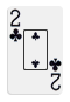

In [26]:
# import image using directory
filepath_of_image = './data/cards/Full/1.png'
image_data = mpimg.imread(filepath_of_image)

# Display card data
print('\nTwo of clubs:')
display(image_data)
print("\nEach image has the following shape: ", image_data.shape)
print("- 76 represents number of pixels row wise; it's a list")
print("- 48 represents number of pixels column wise; it's a list")
print("- 4 represents a list of rgba values; it's also list, each placeholder can store a value from 0 to 255. i.e.  Green is equal to [0, 255, 0, 1]; [r_val, g_val, b_val, a_val] ")
display_cards([image_data])